<center><a href="https://www.nvidia.com/dli"> <img src="https://github.com/stanley160990/AI-101/blob/main/04-Library_DS/Pelatihan-DLI.jpeg?raw=1" alt="Header" style="width: 1000px;"/> </a></center>

# Pengenalan Library Python untuk Data Science dan AI
## Keras (Deep Learning Framework)
### Pelatihan Deep Learning untuk TNI

Notebook ini memperkenalkan **Keras**, library *high-level API* untuk **Deep Learning** di Python.
Keras digunakan di atas **TensorFlow**, membuat proses pembuatan model AI menjadi cepat dan mudah.

---
## 🎯 Tujuan Pembelajaran
- Mengenal konsep dasar Keras dan hubungannya dengan TensorFlow.
- Mempelajari komponen model: layer, neuron, epoch, dan loss.
- Membuat model regresi dan klasifikasi sederhana dengan Keras.
- Menghubungkan Keras dengan konteks militer (prediksi, klasifikasi risiko).

## 🟩 1️⃣ Apa itu Keras?

**Keras** adalah antarmuka (*API*) tingkat tinggi untuk *Deep Learning* yang memudahkan pembuatan model AI.

Keras memungkinkan kita membuat dan melatih jaringan saraf tiruan dengan beberapa baris kode saja.

In [1]:
# Import TensorFlow dan Keras
import tensorflow as tf
from tensorflow import keras

print("TensorFlow version:", tf.__version__)
print("Keras version:", keras.__version__)

TensorFlow version: 2.19.0
Keras version: 3.10.0


## 🟩 2️⃣ Struktur Model Keras

**Keras Sequential Model:**
```
Input Layer → Hidden Layers → Output Layer
```

**Komponen utama:**
- `Dense` → Layer fully connected.
- `Activation` → Fungsi yang mengubah nilai (ReLU, Sigmoid, Softmax).
- `Optimizer` → Algoritma untuk memperbaiki bobot.
- `Loss` → Mengukur kesalahan model.
- `Epoch` → Jumlah iterasi pelatihan.

## 🟩 3️⃣ Model Regresi Linear Sederhana

Model ini belajar hubungan antara jumlah prajurit dan kebutuhan logistik (y = 2x).

In [2]:
from tensorflow.keras import layers
import numpy as np

# Data simulasi
x = np.array([1, 2, 3, 4, 5])
y = np.array([2, 4, 6, 8, 10])

# Model Sequential
model = keras.Sequential([
    layers.Dense(1, input_shape=[1])
])

# Kompilasi model
model.compile(optimizer='sgd', loss='mean_squared_error')

# Latih model
history = model.fit(x, y, epochs=100, verbose=0)

# Prediksi
print("Prediksi untuk x=6:", model.predict(np.array([6])))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
Prediksi untuk x=6: [[11.641354]]


### Visualisasi Loss Training

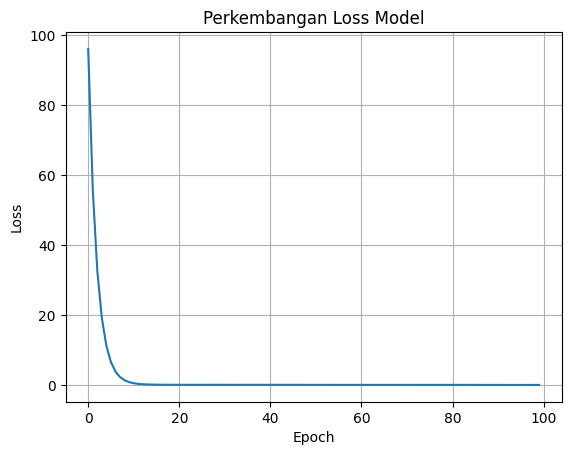

In [3]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.title('Perkembangan Loss Model')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.show()

## 🟩 4️⃣ Klasifikasi Sederhana — Kesiapan Operasi

Model ini mengklasifikasikan status *Siap* (1) atau *Tidak Siap* (0) berdasarkan stok logistik.

In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

data = np.array([[80], [60], [40], [20], [10]])  # stok logistik
label = np.array([[1], [1], [0], [0], [0]])      # 1=Siap, 0=Tidak Siap

model2 = Sequential([
    Dense(4, activation='relu', input_shape=[1]),
    Dense(1, activation='sigmoid')
])

model2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model2.fit(data, label, epochs=200, verbose=0)

pred = model2.predict(np.array([[50]]))
print("Prediksi kesiapan logistik (stok=50):", round(pred[0][0], 2))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
Prediksi kesiapan logistik (stok=50): 0.0


### Visualisasi Probabilitas Kesiapan

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


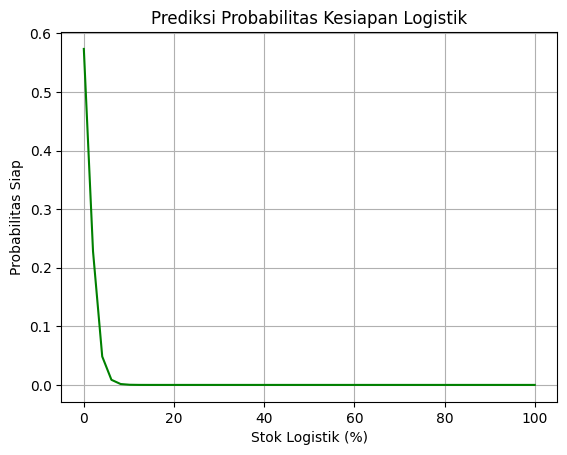

In [5]:
x_values = np.linspace(0, 100, 50).reshape(-1, 1)
predictions = model2.predict(x_values)

plt.plot(x_values, predictions, color='green')
plt.title('Prediksi Probabilitas Kesiapan Logistik')
plt.xlabel('Stok Logistik (%)')
plt.ylabel('Probabilitas Siap')
plt.grid(True)
plt.show()

## 🟩 5️⃣ Artificial Neural Network (ANN)

Model multilayer digunakan untuk menganalisis hubungan kompleks seperti kombinasi prajurit dan ancaman terhadap kesiapan misi.

In [6]:
model3 = Sequential([
    Dense(8, activation='relu', input_shape=[2]),
    Dense(4, activation='relu'),
    Dense(1, activation='sigmoid')
])

model3.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 8)              │            24 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 4)              │            36 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 65 (260.00 B)

 Trainable params: 65 (260.00 B)

 Non-trainable params: 0 (0.00 B)

## 🟩 6️⃣ Studi Kasus: Prediksi Risiko Misi

Simulasi: prediksi apakah misi berisiko *Tinggi* atau *Rendah* berdasarkan **tingkat ancaman** dan **logistik**.

In [7]:
X = np.array([[0.2, 0.8], [0.4, 0.6], [0.7, 0.3], [0.9, 0.2]])
Y = np.array([[0], [0], [1], [1]])  # 1=Risiko Tinggi

model4 = Sequential([
    Dense(4, activation='relu', input_shape=[2]),
    Dense(1, activation='sigmoid')
])

model4.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model4.fit(X, Y, epochs=300, verbose=0)

pred = model4.predict(np.array([[0.6, 0.4]]))
print("Prediksi risiko misi:", 'Tinggi' if pred[0][0] > 0.5 else 'Rendah')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
Prediksi risiko misi: Tinggi


## 🟩 7️⃣ Menyimpan dan Memuat Model

In [8]:
# Menyimpan model
model4.save("model_risiko_misi.h5")

# Memuat kembali model
new_model = keras.models.load_model("model_risiko_misi.h5")
print("Model berhasil dimuat ulang!")

Model berhasil dimuat ulang!


## 🟩 8️⃣ Exercise — Prediksi Kesiapan Unit Operasi

**Tugas:**
1. Buat dataset berisi 3 fitur: `jumlah_prajurit`, `logistik`, `ancaman`.
2. Buat model *Sequential* dengan dua layer tersembunyi.
3. Gunakan fungsi aktivasi `relu` dan `sigmoid`.
4. Latih model untuk memprediksi kesiapan (1=Siap, 0=Tidak Siap).
5. Tampilkan hasil akurasi dan plot grafik loss selama training.

In [17]:
# 🧩 TODO: Latihan Keras untuk prediksi kesiapan unit operasi
# Gunakan Sequential, Dense, compile, fit, dan evaluasi hasilnya
X = np.array([[253, 0.8, 0.2], [186, 0.6, 0.4], [120, 0.3, 0.7], [100, 0.2, 0.9]])
Y = np.array([[1], [1], [0], [0]])  # 1=Siap

model_siap = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation='relu', input_shape=[3]),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_siap.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
cek=model_siap.fit(X, Y, epochs=300, verbose=0)

pred = model_siap.predict(np.array([[200, 0.6, 0.65]]))
print("Prediksi kesiapan unit:", 'Siap' if pred[0][0]>0.5 else 'Tidak Siap')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
Prediksi kesiapan unit: Siap


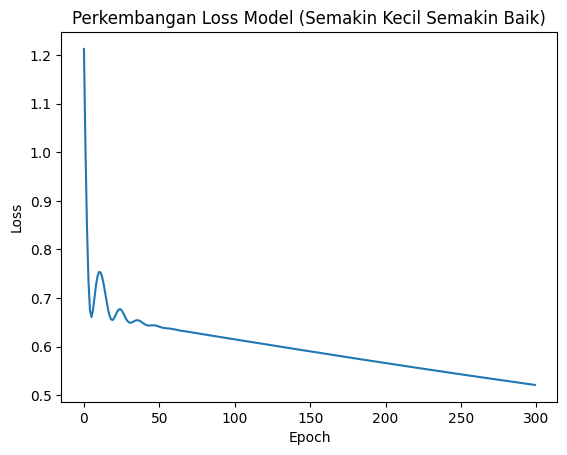

In [18]:
import matplotlib.pyplot as plt

plt.plot(cek.history['loss'])
plt.title('Perkembangan Loss Model (Semakin Kecil Semakin Baik)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()